In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans

In [33]:
c1 = [1.0, -1.5]
c2 = [-1.0, -0.5]
dist = euclidean(c1, c2)    #формула из школьной программы расстояние между точками в пространстве
dist

2.23606797749979

In [34]:
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

data_clustering     #Y - не нужен

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

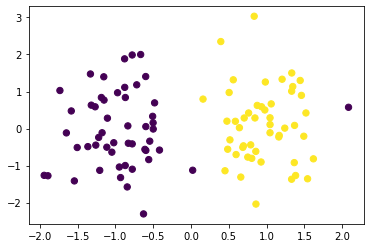

In [35]:
plt.scatter(X[:, 0], X[:, 1], s=40, marker='o', c=Y)     #X[:, 1] -- все строки второй столбец X[:, 0]  -все встроки, первый столбец
plt.show()

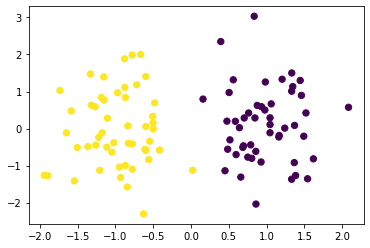

In [36]:
model_kmeans = KMeans(n_clusters=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, marker='o', c=model_kmeans.labels_) 
plt.show()
#по сути точки те же, только кластеризация дает нам метки в аттрибуте .labels_

Реализация алгоритма

In [37]:
def random_centroids_selection(X, n, k):
    """Рандомно инициализируем центр кластера"""
    result = []
    for obj_id in np.random.randint(0, n, size=k):
        result.append(X[obj_id, :])
    return result

In [38]:
def eval_weight_evolution(centroid_object_prev, centroid_objects, k):
    """Вычисляем как за один шаг алгоритма сдвинулись центры"""
    result = []
    for i in range(0, k):
        dist = euclidean(
            centroid_object_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

In [39]:
def eval_cluster_labels(X, centroid_objects):
    #вычисляем метки кластеров
    cluster_dist = euclidean_distances(X, centroid_objects)       #множественные расстояния
    cluster_labels = cluster_dist.argmin(axis=1)
    return cluster_labels

In [40]:
def eval_centroids(X, k, cluster_labels):
    """Вычисляем центры кластеров"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_labels==i].mean(axis=0)
        result.append(new_centroid)

    return result

шаг 0, смещение кластеров: [1.2116194715580684, 0.9772066434504701]
шаг 1, смещение кластеров: [0.2156361506073787, 0.2815463198767179]
шаг 2, смещение кластеров: [0.1254899657225964, 0.15686683584989772]
шаг 3, смещение кластеров: [0.0, 0.0]
шаг 0, смещение кластеров: [0.90994920104879, 0.9753271230822411]
шаг 1, смещение кластеров: [0.08626260862757087, 0.07740057615978198]
шаг 2, смещение кластеров: [0.08087516326245432, 0.08417619033439122]
шаг 3, смещение кластеров: [0.09875523685376572, 0.09255219569732585]
шаг 4, смещение кластеров: [0.0, 0.0]
шаг 0, смещение кластеров: [1.1803590184331274, 0.9813096725200123]
шаг 1, смещение кластеров: [0.1601346272410525, 0.3019705374591676]
шаг 2, смещение кластеров: [0.1104607224100145, 0.172336448980465]
шаг 3, смещение кластеров: [0.10778710781864613, 0.13569196175358858]
шаг 4, смещение кластеров: [0.09838542723489671, 0.10942971579227842]
шаг 5, смещение кластеров: [0.05817860126002373, 0.07404549251275783]
шаг 6, смещение кластеров: [0.

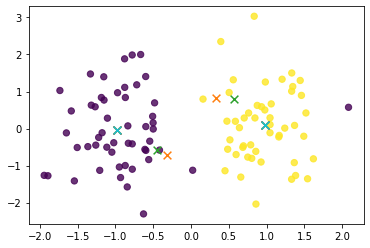

In [58]:
cluster_centers_ = []
def k_means(X: np.array, k: int=2, eps: float=0.001, num_iteration: int=100):
    """
    Алгоритм k-средних 
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    # centroids, cluster_labels = None, None
    try:
        n, m = X.shape
    except ValueError:
        print('Передан некорректный объект X')
    #Инициализируем центры кластеров
    centroid_objects_prev = [np.zeros(m) for i in  range(k)]
    centroid_objects = random_centroids_selection(X, n, k)
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    while sum(weight_evolution[i] > eps for i in range(k))!=0 and step < num_iteration:
        centroid_objects_prev = centroid_objects.copy()
        #вычисляем метки кластеров
        cluster_labels = eval_cluster_labels(X, centroid_objects)

        #вычисляем центроиды кластеров
        centroid_objects = eval_centroids(X, k, cluster_labels)

        #на сколько сместились кластера
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print('шаг %s, смещение кластеров: %s' % (step, weight_evolution))
        step +=1
    return np.vstack(centroid_objects), cluster_labels



for i in range(10):
    centroids, cluster_labels = k_means(X, k=2, num_iteration=10)
    cluster_centers_.append(centroids)

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
for i in range(len(cluster_centers_)):
    plt.scatter(cluster_centers_[i][:, 0], cluster_centers_[i][:, 1], s=60, marker='x')

plt.show()